78.24421606803533


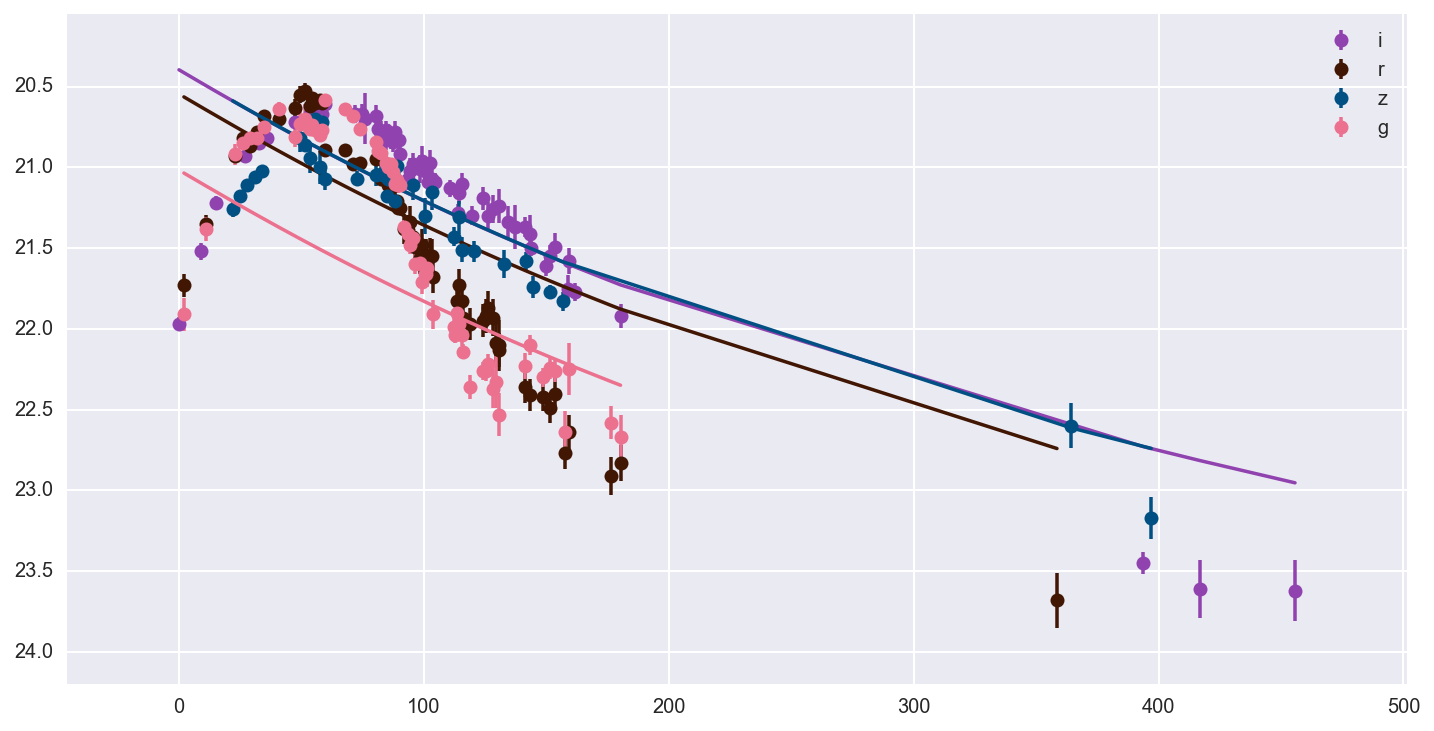

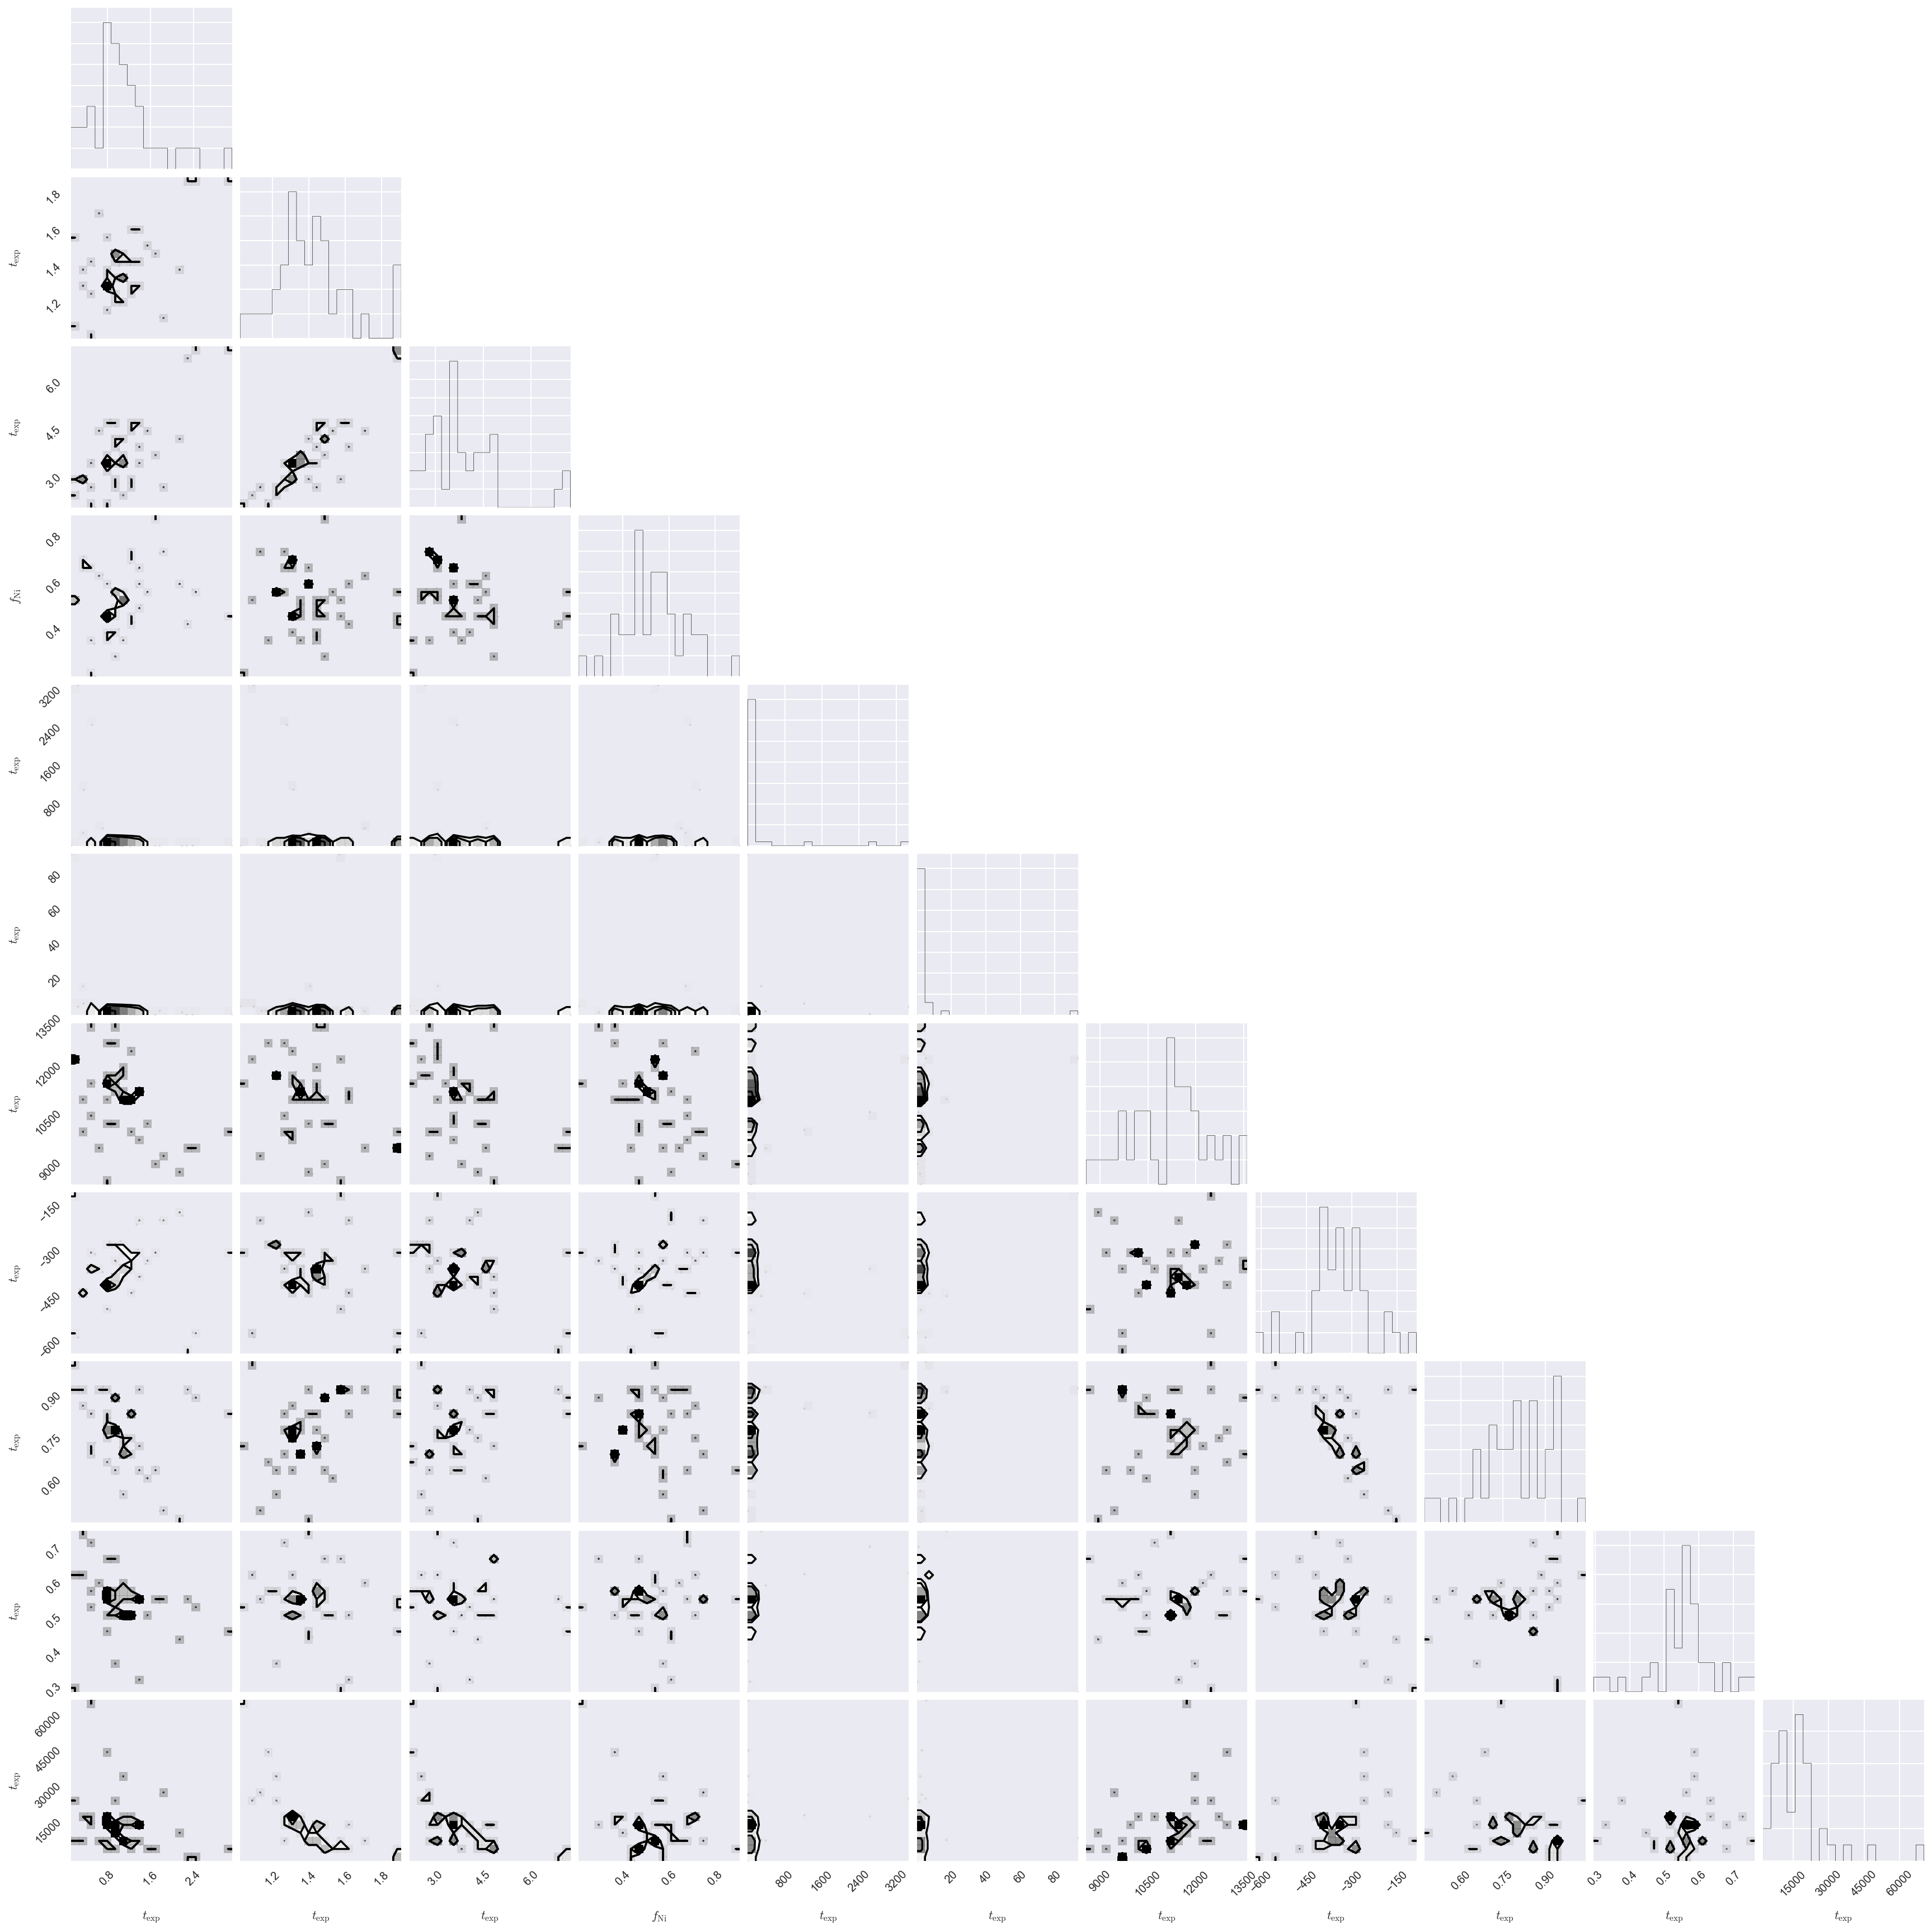

In [48]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import corner
import json
import matplotlib.pyplot as plt
from friendlyfit.plotting import bandcolorf

with open('products/walkers.json', 'r') as f:
    data = json.loads(f.read())
    
# Find best scoring walker
max_score = max([data[x]['score'] for x in data])
print(max_score)
for x in data:
    if data[x]['score'] == max_score:
        bdata = data[x]
        break
band_names = list(set(bdata['bands']))

fig = plt.figure(figsize=(12,6))
for band in band_names:
    xs, ys = zip(*[
        [x, y] for x, y, z in
        zip(bdata['times'], bdata['model_magnitudes'], bdata['bands'])
        if z == band])
    plt.plot(xs, ys, c=bandcolorf(band))
    xs, ys, yes = zip(*[
        [x, y, ye] for x, y, ye, z in
        zip(bdata['times'], bdata['magnitudes'], bdata['e_magnitudes'], bdata['bands'])
        if z == band])
    plt.errorbar(xs, ys, yerr=yes, c=bandcolorf(band), fmt='o', label=band)
plt.gca().invert_yaxis()
plt.margins(0.1,0.1)
plt.legend()
plt.show()
fig.savefig('products/lc.pdf')

# Construct walker arrays for corner
corner_input = []
for w in data:
    stuples = sorted(data[w]['parameters'].items())
    var_names = [data[w]['latex'][x[0]] for x in stuples]
    corner_input.append([x[1] for x in stuples])
cfig = corner.corner(corner_input, labels=var_names)
cfig.savefig('products/corner.pdf')